# Independet Component Analysis with Nilearn (healthy subjects)

In [1]:
from nilearn.decomposition import CanICA
from nilearn.plotting import plot_prob_atlas
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show, plot_prob_atlas, plot_matrix, plot_connectome, find_probabilistic_atlas_cut_coords



/home/jt/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## We are working with 2 different datasets, so we created a list with the corresponding files. We exluded 3 subjects, subject 17, 39 and 48 because of to much movement or artefacts.

In [2]:
files_list=[]
all_list=list(range(1,73))
healthy_list=list(range(52,73))
dep_list=list(range(1,52))
exclution_list=[17,39,48]
for i in healthy_list:
    if i not in exclution_list:
        j="{:02d}".format(i)
        files_list.append("/media/jt/Daten1/preproc/datasink/smooth/sub-"+j+"/task-restingstatewithclosedeyes/fwhm-8_swarsub-"+j+"_task-rest_bold.nii")
    

## Checking the subject list if everything worked well. In this case we are working with the depressiv group.

In [3]:
for i in files_list:
    print (i)

/media/jt/Daten1/preproc/datasink/smooth/sub-52/task-restingstatewithclosedeyes/fwhm-8_swarsub-52_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-53/task-restingstatewithclosedeyes/fwhm-8_swarsub-53_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-54/task-restingstatewithclosedeyes/fwhm-8_swarsub-54_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-55/task-restingstatewithclosedeyes/fwhm-8_swarsub-55_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-56/task-restingstatewithclosedeyes/fwhm-8_swarsub-56_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-57/task-restingstatewithclosedeyes/fwhm-8_swarsub-57_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-58/task-restingstatewithclosedeyes/fwhm-8_swarsub-58_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-59/task-restingstatewithclosedeyes/fwhm-8_swarsub-59_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-60/task-restingstat

## Now we are running the ICA (indipendent component analysis with 20 different components. We made this twice, once with the depressiv group and once with the healthy control group.

In [4]:
canica = CanICA(n_components=20,
                memory="/media/jt/Daten1/preproc/ICA_nilearn/nilearn_cache", memory_level=2,
                verbose=10,
                smoothing_fwhm=8,
                n_jobs=-2,
                mask_strategy='template',
                random_state=0)
canica.fit(files_list)

# Retrieve the independent components in brain space. Directly
# accesible through attribute `components_img_`.
canica_components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
canica_components_img.to_filename('//media/jt/Daten1/preproc/ICA_nilearn/canica_resting_state_healthy.nii.gz')

[MultiNiftiMasker.fit] Loading data from [/media/jt/Daten1/preproc/datasink/smooth/sub-52/task-restingstatewithclosedeyes/fwhm-8_swarsub-52_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-53/task-restingstatewithclosedeyes/fwhm-8_swarsub-53_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-54/task-restingstatewithclosedeyes/fwhm-8_swarsub-54_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-55/task-restingstatewithclosedeyes/fwhm-8_swarsub-55_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-56/task-restingstatewithclosedeyes/fwhm-8_swarsub-56_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-57/task-restingstatewithclosedeyes/fwhm-8_swarsub-57_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-58/task-restingstatewithclosedeyes/fwhm-8_swarsub-58_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-59/task-restingstatewithclosedeyes/fwhm-8_swarsub-59_task-rest_bold.nii,
 /media

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 out of  10 | elapsed:    1.4s remaining:    3.2s
[Parallel(n_jobs=-2)]: Done   5 out of  10 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-2)]: Done   7 out of  10 | elapsed:    1.7s remaining:    0.7s
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    1.9s finished
/home/jt/.local/lib/python3.8/site-packages/nilearn/image/image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


## In case you don't make this whole script in one time you can start here now loading the created ICA file to continue.

In [5]:
# Only run for plotting without processing or further processing of the ICA data without CanICA them again
canica_components_img="/media/jt/Daten1/preproc/ICA_nilearn/canica_resting_state_healthy.nii.gz"

## Here we plot the calculated components by CanICA.

/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2825: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/home/jt/.local/lib/python3.8/site-packages/nilearn/plotting/displays.py:101: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/jt/.local/lib/python3.8/site-packages/nilearn/plotting/displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


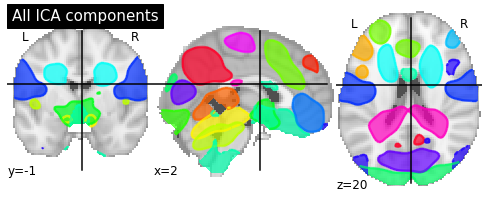

In [6]:
# Plot all ICA components together
plot_prob_atlas(canica_components_img, title='All ICA components')

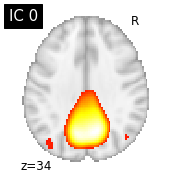

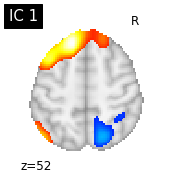

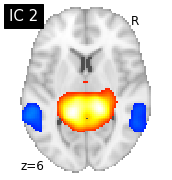

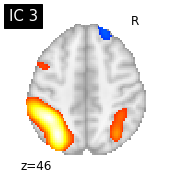

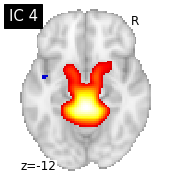

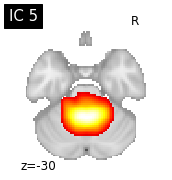

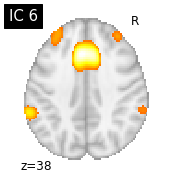

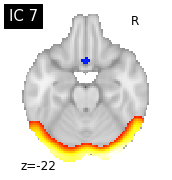

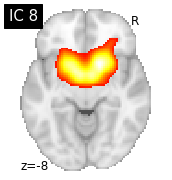

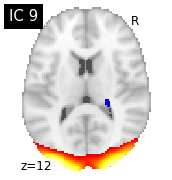

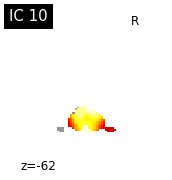

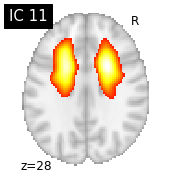

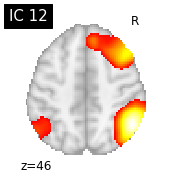

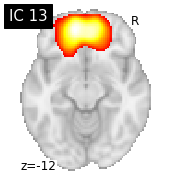

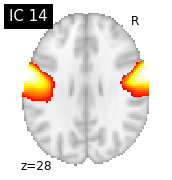

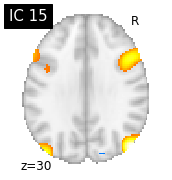

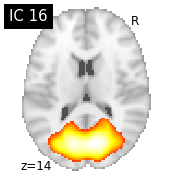

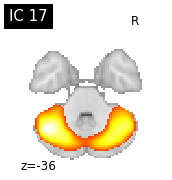

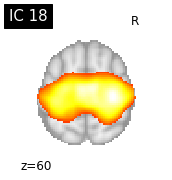

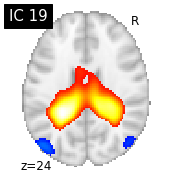

In [7]:
#plot the different slices of components
for i, cur_img in enumerate(iter_img(canica_components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

## Next step is to extract the different regions of the 20 components. Therefore we used the nilearn region extractor with a min region size of 2000. That corresponds to about 100 voxel (2x2x5mm voxel size). 

In [8]:
components_img=canica_components_img

/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/home/jt/.local/lib/python3.8/site-packages/nilearn/image/image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(
/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2825: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/home/jt/.local/lib/python3.8/site-packages/nilearn/plotting/displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/jt/.local/lib/python3.8/site-packages/nilearn/plotting/displays.py:101: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy()

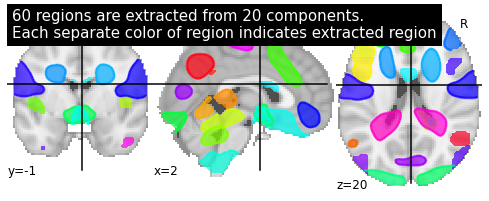

In [9]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor
from nilearn import datasets

atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']

extractor = RegionExtractor(components_img, threshold=1.0,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=2000)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

# Visualization of region extraction results
title = ('%d regions are extracted from %d components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 20))
plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

## Now we are ready to extract the different timeseries of the subjects.

In [10]:
# First we need to do subjects timeseries signals extraction and then estimating
# correlation matrices on those signals.
# To extract timeseries signals, we call transform() from RegionExtractor object
# onto each subject functional data stored in files_list.
# To estimate correlation matrices we import connectome utilities from nilearn
from nilearn.connectome import ConnectivityMeasure

correlations = []
# Initializing ConnectivityMeasure object with kind='correlation'
connectome_measure = ConnectivityMeasure(kind='correlation')
for filename in files_list:
    # call transform from RegionExtractor object to extract timeseries signals
    timeseries_each_subject = extractor.transform(filename)
    # call fit_transform from ConnectivityMeasure object
    correlation = connectome_measure.fit_transform([timeseries_each_subject])
    # saving each subject correlation to correlations
    correlations.append(correlation)

# Mean of all correlations
import numpy as np
mean_correlations = np.mean(correlations, axis=0).reshape(n_regions_extracted,
                                                          n_regions_extracted)

## Importing the atlas for labeling the matrices later

In [11]:
from nilearn import image
from nilearn import input_data
from nilearn import datasets
msdl_atlas_dataset = datasets.fetch_atlas_msdl()

# A "memory" to avoid recomputation
from joblib import Memory
mem = Memory('nilearn_cache')

masker = input_data.NiftiMapsMasker(
    msdl_atlas_dataset.maps, resampling_target="maps", detrend=True,
    high_variance_confounds=True, low_pass=None, high_pass=0.01,
    t_r=2, standardize=True, memory='nilearn_cache', memory_level=1,
    verbose=2)
masker.fit()

subject_time_series = []
func_filenames = files_list
for func_filename in (func_filenames):
    print("Processing file %s" % func_filename)

    region_ts = masker.transform(func_filename)
    subject_time_series.append(region_ts)

/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


[NiftiMapsMasker.fit] loading regions from /home/jt/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/home/jt/.local/lib/python3.8/site-packages/nilearn/image/image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


Processing file /media/jt/Daten1/preproc/datasink/smooth/sub-52/task-restingstatewithclosedeyes/fwhm-8_swarsub-52_task-rest_bold.nii
________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('/media/jt/Daten1/preproc/datasink/smooth/sub-52/task-restingstatewithclosedeyes/fwhm-8_swarsub-52_task-rest_bold.nii')
__________________________________________high_variance_confounds - 2.7s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/media/jt/Daten1/preproc/datasink/smooth/sub-52/task-restingstatewithclosedeyes/fwhm-8_swarsub-52_task-rest_bold.nii', 
{ 'allow_overlap': True,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': True,
  'low_pass': None,
  'maps_img': '/home/jt/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.n

__________________________________________high_variance_confounds - 2.6s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/media/jt/Daten1/preproc/datasink/smooth/sub-56/task-restingstatewithclosedeyes/fwhm-8_swarsub-56_task-rest_bold.nii', 
{ 'allow_overlap': True,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': True,
  'low_pass': None,
  'maps_img': '/home/jt/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': 2,
  'target_affine': array([[   4.,    0.,    0.,  -78.],
       [   0.,    4.,    0., -111.],
       [   0.,    0.,    4.,  -51.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (40, 48, 35)}, confounds=[ array([[ 0.009714, ..., -0.02162 ],
       ...,
       [ 0.051722, ..., -0.035099]])], sa

__________________________________________high_variance_confounds - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/media/jt/Daten1/preproc/datasink/smooth/sub-60/task-restingstatewithclosedeyes/fwhm-8_swarsub-60_task-rest_bold.nii', 
{ 'allow_overlap': True,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': True,
  'low_pass': None,
  'maps_img': '/home/jt/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': 2,
  'target_affine': array([[   4.,    0.,    0.,  -78.],
       [   0.,    4.,    0., -111.],
       [   0.,    0.,    4.,  -51.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (40, 48, 35)}, confounds=[ array([[-0.040403, ...,  0.054425],
       ...,
       [ 0.04692 , ..., -0.053091]])], sa

__________________________________________high_variance_confounds - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/media/jt/Daten1/preproc/datasink/smooth/sub-64/task-restingstatewithclosedeyes/fwhm-8_swarsub-64_task-rest_bold.nii', 
{ 'allow_overlap': True,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': True,
  'low_pass': None,
  'maps_img': '/home/jt/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': 2,
  'target_affine': array([[   4.,    0.,    0.,  -78.],
       [   0.,    4.,    0., -111.],
       [   0.,    0.,    4.,  -51.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (40, 48, 35)}, confounds=[ array([[-0.001694, ...,  0.124973],
       ...,
       [ 0.12469 , ...,  0.074995]])], sa

__________________________________________high_variance_confounds - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/media/jt/Daten1/preproc/datasink/smooth/sub-68/task-restingstatewithclosedeyes/fwhm-8_swarsub-68_task-rest_bold.nii', 
{ 'allow_overlap': True,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': True,
  'low_pass': None,
  'maps_img': '/home/jt/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': 2,
  'target_affine': array([[   4.,    0.,    0.,  -78.],
       [   0.,    4.,    0., -111.],
       [   0.,    0.,    4.,  -51.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (40, 48, 35)}, confounds=[ array([[-0.006067, ..., -0.168544],
       ...,
       [-0.087805, ...,  0.178932]])], sa

__________________________________________high_variance_confounds - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/media/jt/Daten1/preproc/datasink/smooth/sub-72/task-restingstatewithclosedeyes/fwhm-8_swarsub-72_task-rest_bold.nii', 
{ 'allow_overlap': True,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': True,
  'low_pass': None,
  'maps_img': '/home/jt/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': 2,
  'target_affine': array([[   4.,    0.,    0.,  -78.],
       [   0.,    4.,    0., -111.],
       [   0.,    0.,    4.,  -51.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (40, 48, 35)}, confounds=[ array([[ 0.0318  , ...,  0.024652],
       ...,
       [-0.101141, ..., -0.044573]])], sa

## We use two different ways to compute the precision and correlation, GraphicalLassoCV and GroupSparseCovarianceCV

In [12]:
from nilearn.connectome import GroupSparseCovarianceCV
gsc = GroupSparseCovarianceCV(verbose=2)
gsc.fit(subject_time_series)

try:
    from sklearn.covariance import GraphicalLassoCV
except ImportError:
    # for Scitkit-Learn < v0.20.0
    from sklearn.covariance import GraphLassoCV as GraphicalLassoCV

gl = GraphicalLassoCV(verbose=2)
gl.fit(np.concatenate(subject_time_series))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 5
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 2
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 5
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 9
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 9
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 10
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  1 out of 4


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   32.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 8
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 8
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 7
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 6
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 8
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 7
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 7
[GroupSparseCovarianceCV.fit] Log-likeli

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   57.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 4


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 10
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 9
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 6
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 6
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 8


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   54.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  3 out of 4
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 6


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 13
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 7
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 8
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 6
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 9
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 8
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 8


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   50.6s finished


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  4 out of 4
[GroupSparseCovarianceCV.fit] Final optimization
[GroupSparseCovarianceCV.fit] tolerance reached at iteration number 23: 8.801e-04


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   1s


....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   3s


....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   6s


....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


[GraphicalLassoCV] Done refinement  4 out of 4:   8s
[graphical_lasso] Iteration   0, cost  1.62e+02, dual gap 4.862e-01
[graphical_lasso] Iteration   1, cost  1.62e+02, dual gap -1.406e-02
[graphical_lasso] Iteration   2, cost  1.62e+02, dual gap -8.801e-04
[graphical_lasso] Iteration   3, cost  1.62e+02, dual gap -1.949e-04
[graphical_lasso] Iteration   4, cost  1.62e+02, dual gap 6.202e-05


GraphicalLassoCV(verbose=2)

## Define a function to plot the matrices easier. 

In [13]:
import numpy as np

from nilearn import plotting

def plot_matrices(cov, prec, title, labels):
    """Plot covariance and precision matrices, for a given processing. """

    prec = prec.copy()  # avoid side effects

    # Put zeros on the diagonal, for graph clarity.
    size = prec.shape[0]
    prec[list(range(size)), list(range(size))] = 0
    span = max(abs(prec.min()), abs(prec.max()))

    # Display covariance matrix
    plotting.plot_matrix(cov, cmap=plotting.cm.bwr,
                         vmin=-1, vmax=1, title="%s / covariance" % title,
                         labels=labels)
    # Display precision matrix
    plotting.plot_matrix(prec, cmap=plotting.cm.bwr,
                         vmin=-span, vmax=span, title="%s / precision" % title,
                         labels=labels)

## Plot the connectomes and matrices 

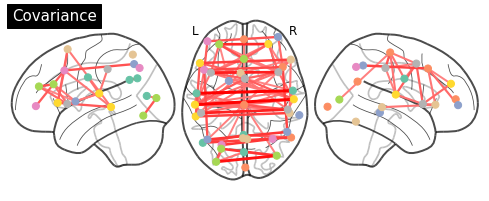

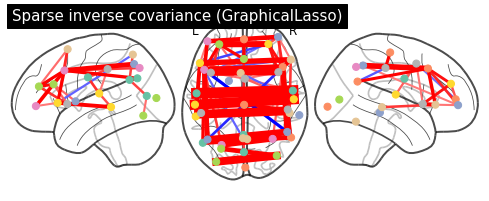

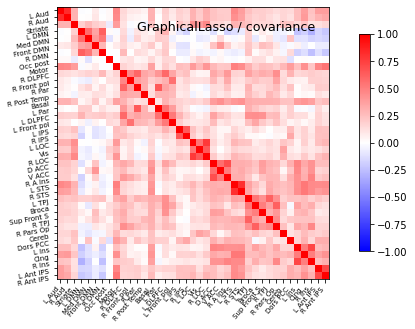

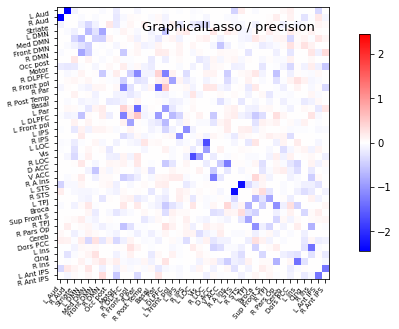

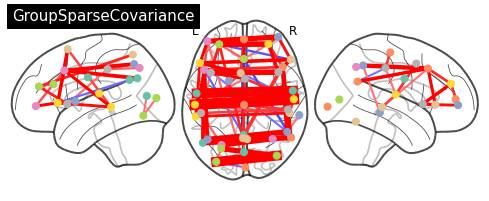

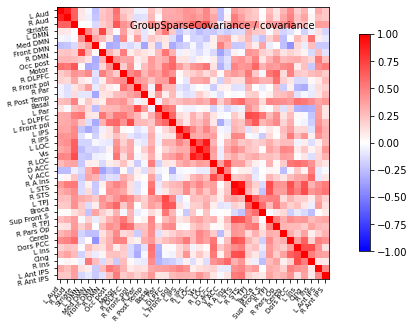

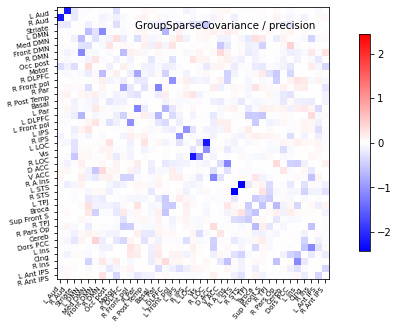

In [14]:
atlas_img = msdl_atlas_dataset.maps
atlas_region_coords = plotting.find_probabilistic_atlas_cut_coords(atlas_img)
labels = msdl_atlas_dataset.labels

plotting.plot_connectome(gl.covariance_,
                         atlas_region_coords, edge_threshold='90%',
                         title="Covariance",
                         display_mode="lzr")
plotting.plot_connectome(-gl.precision_, atlas_region_coords,
                         edge_threshold='90%',
                         title="Sparse inverse covariance (GraphicalLasso)",
                         display_mode="lzr",
                         edge_vmax=.5, edge_vmin=-.5)
plot_matrices(gl.covariance_, gl.precision_, "GraphicalLasso", labels)

title = "GroupSparseCovariance"
plotting.plot_connectome(-gsc.precisions_[..., 0],
                         atlas_region_coords, edge_threshold='90%',
                         title=title,
                         display_mode="lzr",
                         edge_vmax=.5, edge_vmin=-.5)
plot_matrices(gsc.covariances_[..., 0],
              gsc.precisions_[..., 0], title, labels)
import numpy as np
import matplotlib.pyplot as plt
plotting.show()



## Save the matrices

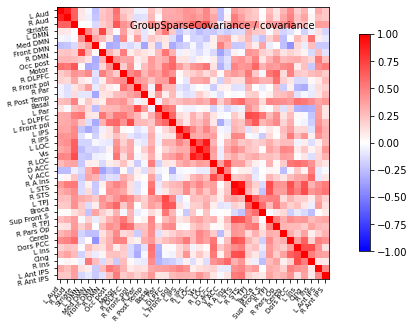

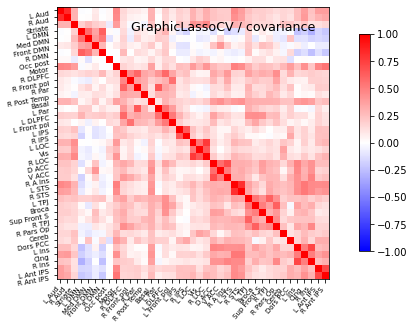

In [15]:
from nilearn import plotting

#1st matrix
cov=gsc.covariances_[..., 0]
title='GroupSparseCovariance'
display=plotting.plot_matrix(cov, cmap=plotting.cm.bwr,
                     vmin=-1, vmax=1, title="%s / covariance" % title,
                     labels=labels)
display.figure.savefig('GSC_covariance_healthy.png', dpi=300)
plotting.show()


# 2nd matrix
cov=gl.covariance_
title='GraphicLassoCV'
# Display covariance matrix
display=plotting.plot_matrix(cov, cmap=plotting.cm.bwr,
                     vmin=-1, vmax=1, title="%s / covariance" % title,
                     labels=labels)
display.figure.savefig('GL_covariances_healthy.png', dpi=300)

## Save the precision matrix

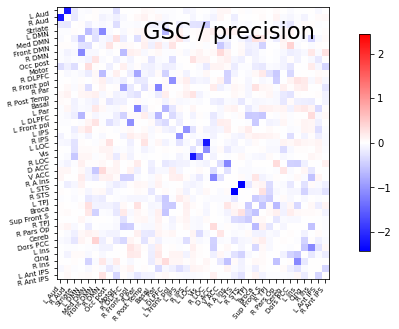

In [21]:
prec = gsc.precisions_[..., 0]
# Put zeros on the diagonal, for graph clarity.
size = prec.shape[0]
prec[list(range(size)), list(range(size))] = 0
span = max(abs(prec.min()), abs(prec.max()))
title='GSC'
# Display precision matrix
display=plotting.plot_matrix(prec, cmap=plotting.cm.bwr,
                     vmin=-span, vmax=span, title="%s / precision" % title,
                     labels=labels)

display.figure.savefig('Precision_healthy.png', dpi=300)
plotting.show()

## Matrices are nice to see but we look also for the exactly figures and saving the as .csv file.

In [22]:
import pandas as pd
df=pd.DataFrame(data=gl.covariance_, index=labels, columns=labels)
df.to_csv('GL_covariances_dep.csv')
df

,L Aud,R Aud,Striate,L DMN,Med DMN,Front DMN,R DMN,Occ post,Motor,R DLPFC,...,Sup Front S,R TPJ,R Pars Op,Cereb,Dors PCC,L Ins,Cing,R Ins,L Ant IPS,R Ant IPS
L Aud,1.000000,0.821322,0.302834,-0.007970,-0.000290,0.083248,-0.008446,0.025825,0.471992,0.153481,...,0.187710,0.164365,0.139000,0.160901,0.141476,0.254763,0.382023,0.234387,0.380239,0.381568
R Aud,0.821322,1.000000,0.296288,0.003880,0.008565,0.096501,-0.007617,0.029980,0.455368,0.135232,...,0.191201,0.145730,0.106199,0.160628,0.123911,0.253044,0.394793,0.226349,0.300582,0.342406
Striate,0.302834,0.296288,1.000000,0.186124,0.271864,0.192337,0.155576,-0.072835,0.385552,0.114155,...,0.162618,0.149518,0.104844,0.240618,0.216173,0.155662,0.223019,0.112553,0.121608,0.163799
L DMN,-0.007970,0.003880,0.186124,1.000000,0.568449,0.357647,0.621197,0.017152,-0.020522,0.143032,...,0.078178,0.029761,-0.057754,-0.046867,-0.015133,-0.237673,-0.187451,-0.311885,-0.162219,-0.216600
Med DMN,-0.000290,0.008565,0.271864,0.568449,1.000000,0.406085,0.537214,-0.114467,0.030808,0.179529,...,0.026600,0.107054,-0.064841,-0.096755,0.233878,-0.121988,-0.111553,-0.172688,-0.149471,-0.173618
Front DMN,0.083248,0.096501,0.192337,0.357647,0.406085,1.000000,0.288223,0.014671,0.085228,0.154653,...,0.253364,0.210990,0.101415,-0.039521,-0.019831,0.047874,-0.068672,-0.006849,-0.070474,-0.077322
R DMN,-0.008446,-0.007617,0.155576,0.621197,0.537214,0.288223,1.000000,-0.000791,-0.003168,0.270195,...,0.082336,0.123463,0.050905,-0.035837,0.143137,-0.182998,-0.125727,-0.242219,-0.121337,-0.216231
Occ post,0.025825,0.029980,-0.072835,0.017152,-0.114467,0.014671,-0.000791,1.000000,-0.001135,0.097417,...,0.131882,0.036918,0.104544,0.112441,-0.121793,0.000832,0.008614,-0.001215,0.007786,0.012463
Motor,0.471992,0.455368,0.385552,-0.020522,0.030808,0.085228,-0.003168,-0.001135,1.000000,0.165353,...,0.252036,0.238690,0.193177,0.278199,0.385122,0.246856,0.434211,0.220535,0.470407,0.543659
R DLPFC,0.153481,0.135232,0.114155,0.143032,0.179529,0.154653,0.270195,0.097417,0.165353,1.000000,...,0.321722,0.294848,0.438051,0.132872,0.294629,0.150487,0.171525,0.199701,0.175174,0.160887


In [23]:
import pandas as pd
df=pd.DataFrame(data=gsc.covariances_[..., 0], index=labels, columns=labels)
df.to_csv('GSC_covariances_dep.csv')
df

,L Aud,R Aud,Striate,L DMN,Med DMN,Front DMN,R DMN,Occ post,Motor,R DLPFC,...,Sup Front S,R TPJ,R Pars Op,Cereb,Dors PCC,L Ins,Cing,R Ins,L Ant IPS,R Ant IPS
L Aud,1.000000,0.863683,0.617724,0.098714,-0.038518,-0.249383,0.214160,0.280954,0.562076,0.197000,...,0.010756,0.251799,0.108332,0.286633,0.452958,0.182039,0.291300,-0.015151,0.333270,0.226463
R Aud,0.863683,1.000000,0.617721,0.089870,-0.062214,-0.221921,0.230728,0.284349,0.523373,0.265652,...,0.017269,0.311556,0.123411,0.350935,0.476658,0.235669,0.355265,0.052710,0.256362,0.213105
Striate,0.617724,0.617721,1.000000,-0.002543,-0.015340,-0.147667,0.191735,0.260023,0.661112,0.418348,...,0.131641,0.385253,0.394537,0.440898,0.573878,0.219765,0.272360,0.019144,0.386343,0.370689
L DMN,0.098714,0.089870,-0.002543,1.000000,0.468413,0.242627,0.732315,0.208571,-0.020530,0.377757,...,0.201256,-0.025664,0.191462,-0.166859,-0.113443,-0.016284,-0.178655,-0.054978,0.120895,-0.157023
Med DMN,-0.038518,-0.062214,-0.015340,0.468413,1.000000,0.358505,0.267446,0.105625,-0.332911,0.462978,...,-0.231487,0.172158,0.318773,-0.243839,0.008547,0.266959,0.138646,0.533224,0.072065,-0.091328
Front DMN,-0.249383,-0.221921,-0.147667,0.242627,0.358505,1.000000,0.020555,-0.327625,-0.302263,-0.115094,...,0.356667,-0.075448,-0.002901,-0.245528,-0.415967,0.152029,-0.070452,0.255722,-0.209726,-0.209270
R DMN,0.214160,0.230728,0.191735,0.732315,0.267446,0.020555,1.000000,0.309723,0.159567,0.506717,...,0.189947,0.133763,0.273897,0.110393,0.172848,0.120622,0.041138,-0.146768,0.266023,-0.117087
Occ post,0.280954,0.284349,0.260023,0.208571,0.105625,-0.327625,0.309723,1.000000,0.436726,0.349386,...,0.095442,0.297827,0.433008,0.267675,0.300594,0.315028,0.236679,0.158979,0.531184,0.246319
Motor,0.562076,0.523373,0.661112,-0.020530,-0.332911,-0.302263,0.159567,0.436726,1.000000,0.199175,...,0.301348,0.402235,0.381977,0.456285,0.498775,0.073883,0.243153,-0.207019,0.451179,0.509541
R DLPFC,0.197000,0.265652,0.418348,0.377757,0.462978,-0.115094,0.506717,0.349386,0.199175,1.000000,...,-0.033459,0.529589,0.616645,0.146605,0.491149,0.217553,0.190786,0.265542,0.289921,0.199656


In [24]:
from PIL import Image
import urllib.request

URL = 'https://st.depositphotos.com/1431107/1631/i/950/depositphotos_16317151-stock-photo-well-done-illustration.jpg'

with urllib.request.urlopen(URL) as url:
    with open('temp.jpg', 'wb') as f:
        f.write(url.read())

img = Image.open('temp.jpg')

img.show()